In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM, Dense
from keras.layers import GRU 
from keras import backend as K
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [3]:
exchange_data = pd.read_csv('GBPUSD-DAILY.csv')
exchange_data.head()

,time,open,high,low,close,Volume,Volume MA
0,2002-05-06T21:00:00Z,1.46810,1.4681,1.46810,1.46810,1,NaN
1,2002-05-07T21:00:00Z,1.46810,1.4681,1.45585,1.45585,1,NaN
2,2002-05-08T21:00:00Z,1.45585,1.4600,1.45585,1.46000,1,NaN
3,2002-05-09T21:00:00Z,1.46000,1.4639,1.46000,1.46390,1,NaN
4,2002-05-12T21:00:00Z,1.46390,1.4639,1.45670,1.45670,1,NaN


In [4]:
exchange_data["time"] = pd.to_datetime(exchange_data["time"])
ind_exchange_data = exchange_data.set_index(["time"], drop=True)
ind_exchange_data.head()

,open,high,low,close,Volume,Volume MA
time,,,,,,
2002-05-06 21:00:00+00:00,1.46810,1.4681,1.46810,1.46810,1,NaN
2002-05-07 21:00:00+00:00,1.46810,1.4681,1.45585,1.45585,1,NaN
2002-05-08 21:00:00+00:00,1.45585,1.4600,1.45585,1.46000,1,NaN
2002-05-09 21:00:00+00:00,1.46000,1.4639,1.46000,1.46390,1,NaN
2002-05-12 21:00:00+00:00,1.46390,1.4639,1.45670,1.45670,1,NaN


In [5]:
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=False)

cut_off_date = pd.Timestamp('15-02-22')
adjusted_data = data_frame.loc[:cut_off_date]
adjusted_data.head()

/var/folders/qs/tq01j0l577ddz8gg_tnvhl6m0000gn/T/ipykernel_55271/1622582736.py:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  adjusted_data = data_frame.loc[:cut_off_date]


,open,low,high,close,Volume MA,Volume
time,,,,,,
2002-05-06 21:00:00+00:00,1.46810,1.46810,1.4681,1.46810,NaN,1
2002-05-07 21:00:00+00:00,1.46810,1.45585,1.4681,1.45585,NaN,1
2002-05-08 21:00:00+00:00,1.45585,1.45585,1.4600,1.46000,NaN,1
2002-05-09 21:00:00+00:00,1.46000,1.46000,1.4639,1.46390,NaN,1
2002-05-12 21:00:00+00:00,1.46390,1.45670,1.4639,1.45670,NaN,1


<AxesSubplot: xlabel='time'>

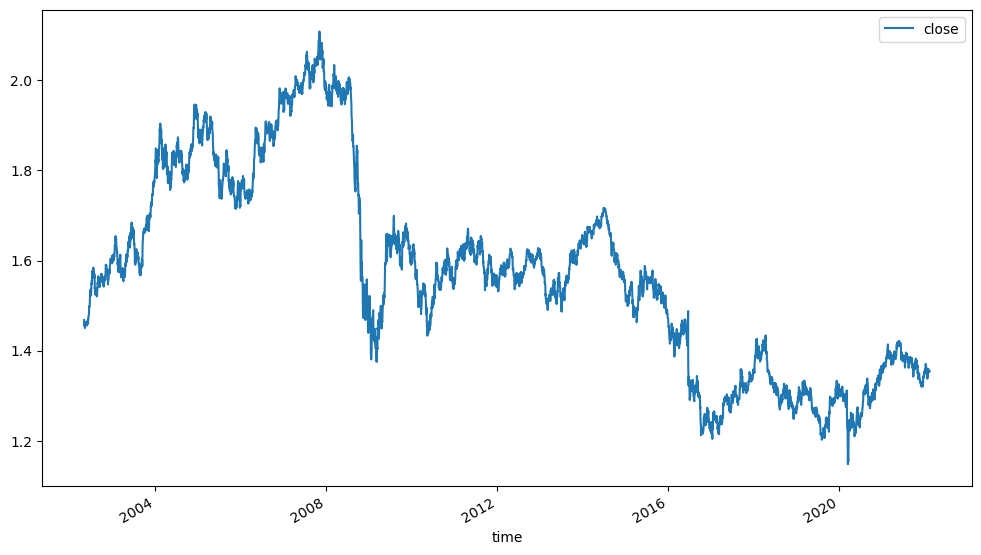

In [6]:
df = adjusted_data[["close"]]

#plotting dataset to visualize the pattern of prices over the years

df.plot(kind='line',figsize=(12,7))

In [7]:
print(len(adjusted_data))

5140


In [8]:
diff = df.index.values[-1] - df.index.values[0]



days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 2010 to %d"%(2010 + int(0.8*years)))



Total data: 19 years
80 percent data = 2010 to 2025


In [9]:
df.describe()

,close
count,5140.000000
mean,1.574070
std,0.220295
min,1.148530
25%,1.381845
50%,1.568650
75%,1.712835
max,2.107560


In [10]:
#deduce where the number where the partition should be made 

adjust_data_frame = np.array(data_frame)
x = int(len(data_frame))
print(x)
split_length = int(x * 0.8)
print(split_length)





5404
4323


In [11]:
split_date = adjusted_data.index[split_length]
print(adjusted_data.index[split_length])
print(split_date)


2018-12-20 22:00:00+00:00
2018-12-20 22:00:00+00:00


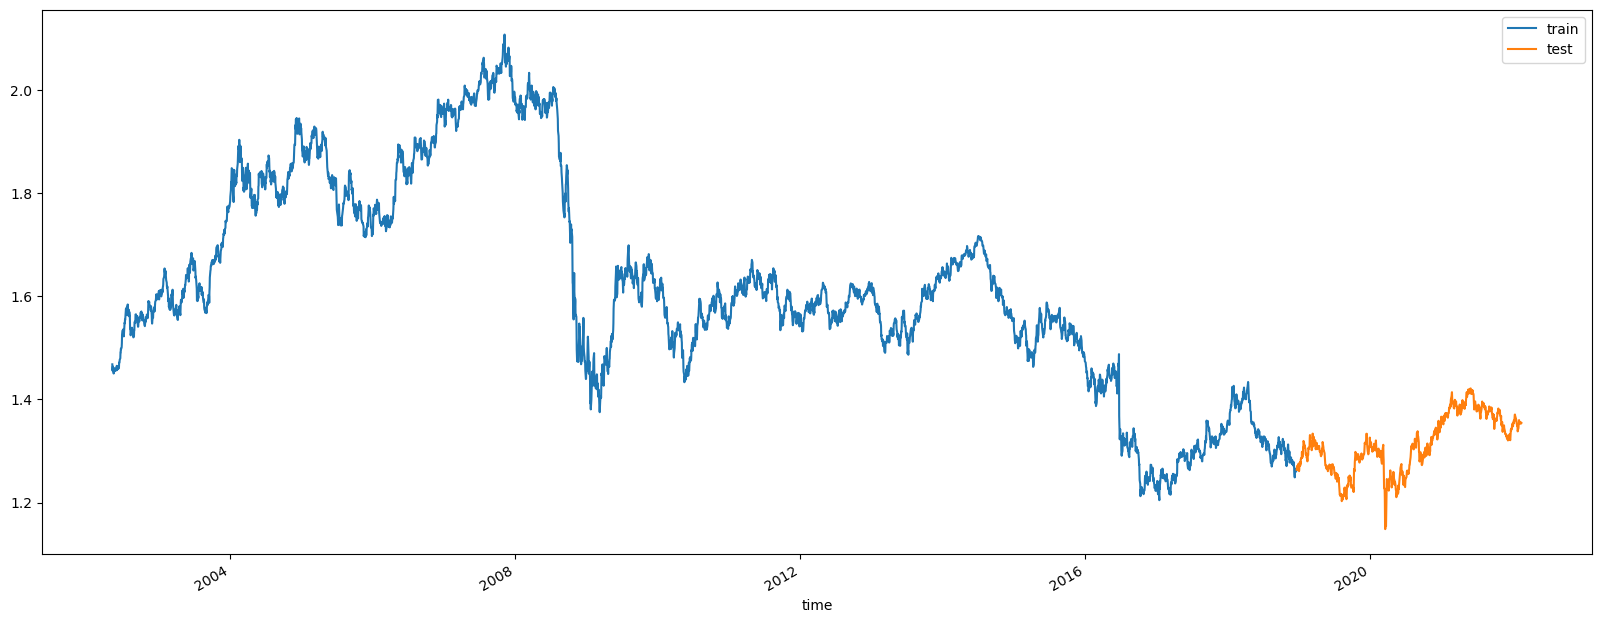

In [12]:
train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot(kind='line',figsize=(20,8))
test.plot(ax=ax,kind='line',figsize=(20,8))
plt.legend(['train', 'test'])


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [15]:
X_train = train_sc[:-1]
y_train = train_sc[1:]


X_test = test_sc[:-1]
y_test = test_sc[1:]



In [16]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200


2023-02-21 20:08:39.077603: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4323/4323 [==============================] - 1s 291us/step - loss: 0.0049 - rmse: 0.0702
Epoch 2/200
4323/4323 [==============================] - 1s 284us/step - loss: 0.0026 - rmse: 0.0509
Epoch 3/200
4323/4323 [==============================] - 1s 283us/step - loss: 0.0025 - rmse: 0.0502
Epoch 4/200
4323/4323 [==============================] - 1s 283us/step - loss: 0.0025 - rmse: 0.0500
Epoch 5/200
4323/4323 [==============================] - 1s 288us/step - loss: 0.0025 - rmse: 0.0500
Epoch 6/200
4323/4323 [==============================] - 1s 284us/step - loss: 0.0025 - rmse: 0.0500
Epoch 7/200
4323/4323 [==============================] - 1s 284us/step - loss: 0.0025 - rmse: 0.0500
Epoch 7: early stopping


In [18]:
#y pred_test is the actual ANN predictions
y_pred_test = model.predict(X_test)
y_train_pred = model.predict(y_train)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))


136/136 [==============================] - 0s 241us/step
The R2 score on the Train set is:	0.933
The  MAE on the Train set is:	0.205
The  RMSE on the Train set is:	0.259
The Adjusted R2 score on the Train set is:	0.933

The R2 score on the Test set is:	0.955
The Adjusted R2 score on the Test set is:	0.955
The  MAE on the Test set is:	0.048
The  RMSE on the Test set is:	0.058


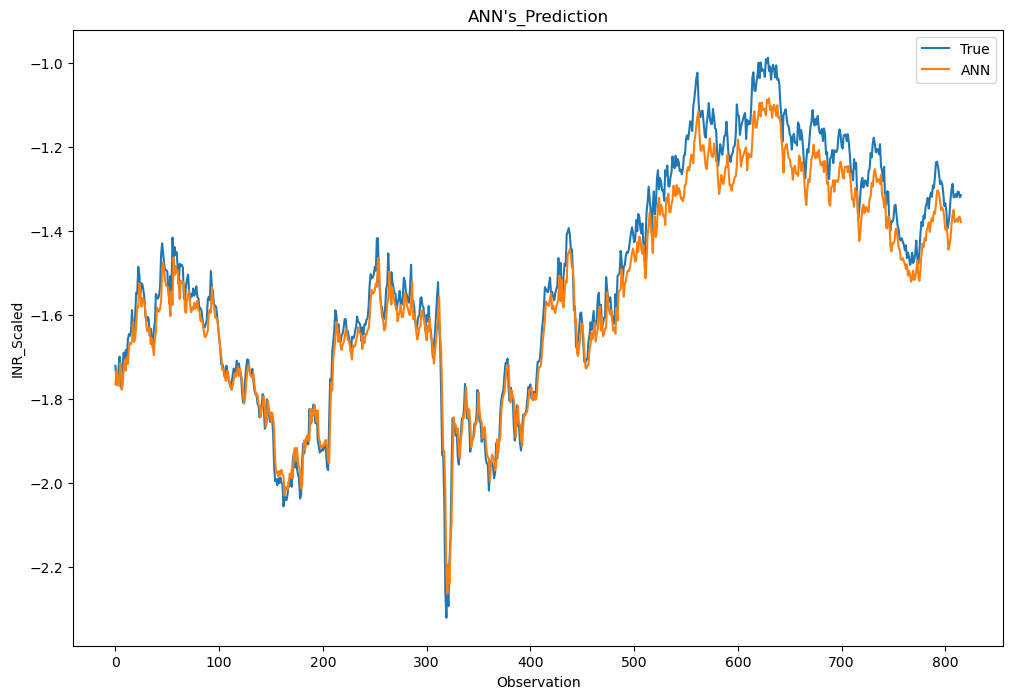

In [19]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [20]:
#Test is with future predictions 


last_value_ann = y_test[-1:]


future_predictions_ann = []
num_steps = 10

for i in range(num_steps):
    prediction_ann = model.predict(last_value_ann.reshape(-1,1))
    
    future_predictions_ann.append(prediction_ann[0][0])
    
    last_value_ann = np.concatenate((last_value_ann[1:], prediction_ann), axis=0)

    
future_predictions_ann = np.array(future_predictions_ann).reshape(-1, 1) 
inverse_transformed_data = sc.inverse_transform(future_predictions_ann).flatten().tolist()
print(inverse_transformed_data)






1/1 [==============================] - 0s 9ms/step
[1.3422284126281738, 1.3315281867980957, 1.322059154510498, 1.313679575920105, 1.3062642812728882, 1.2997020483016968, 1.2938950061798096, 1.2887561321258545, 1.2842084169387817, 1.2801841497421265]


In [21]:
rounded_numbers = [round(num, 5) for num in inverse_transformed_data]
print(rounded_numbers)

print(sc.inverse_transform(y_train_pred[-1:]))
        
                   

[1.34223, 1.33153, 1.32206, 1.31368, 1.30626, 1.2997, 1.2939, 1.28876, 1.28421, 1.28018]
[[1.2621682]]


In [22]:
print(sc.inverse_transform(y_test[-1:]))

[[1.35432]]


In [23]:
#LSTM TIME STEPS 


X = []
y = []
timesteps = 7

for i in range(timesteps, train.shape[0]):
    X.append(train_sc[i-timesteps:i, 0])
    y.append(train_sc[i, 0])



X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(X.shape)
print(y.shape)




(4317, 7, 1)
(4317,)


In [24]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()


#model_lstm= Sequential()
#model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)))
#model_lstm.add(LSTM(32, activation='relu',return_sequences=True))
#model_lstm.add(LSTM(16, activation='relu',return_sequences=True))
#model_lstm.add(GRU(16,  activation='linear', kernel_initializer='lecun_uniform', return_sequences=False))
#model_lstm.add(Dense(1))
#model_lstm.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 7, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
#there may be a potiental error in this, change y_train???
history_model_lstm = model_lstm.fit(X, y, epochs=100, batch_size=192, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
23/23 [==============================] - 2s 8ms/step - loss: 0.5626 - rmse: 0.7501
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0660 - rmse: 0.2570
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1348 - rmse: 0.3672
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0337 - rmse: 0.1836
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1268 - rmse: 0.3560
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1067 - rmse: 0.3267
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1902 - rmse: 0.4362
Epoch 8/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0420 - rmse: 0.2049
Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0290 - rmse: 0.1702
Epoch 10/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0595 - rmse: 0.2438
Epoch 11/100
23/23 [=========================

In [26]:
X_test_lstm = []
Y_test_lstm = []

for i in range(timesteps, test.shape[0]):
    X_test_lstm.append(test_sc[i-timesteps:i, 0])
    Y_test_lstm.append(test_sc[i, 0])

    
X_test_lstm = np.array(X_test_lstm)
Y_test_lstm = np.array(Y_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

y_pred_test_lstm = model_lstm.predict(X_test_lstm)








26/26 [==============================] - 0s 1ms/step


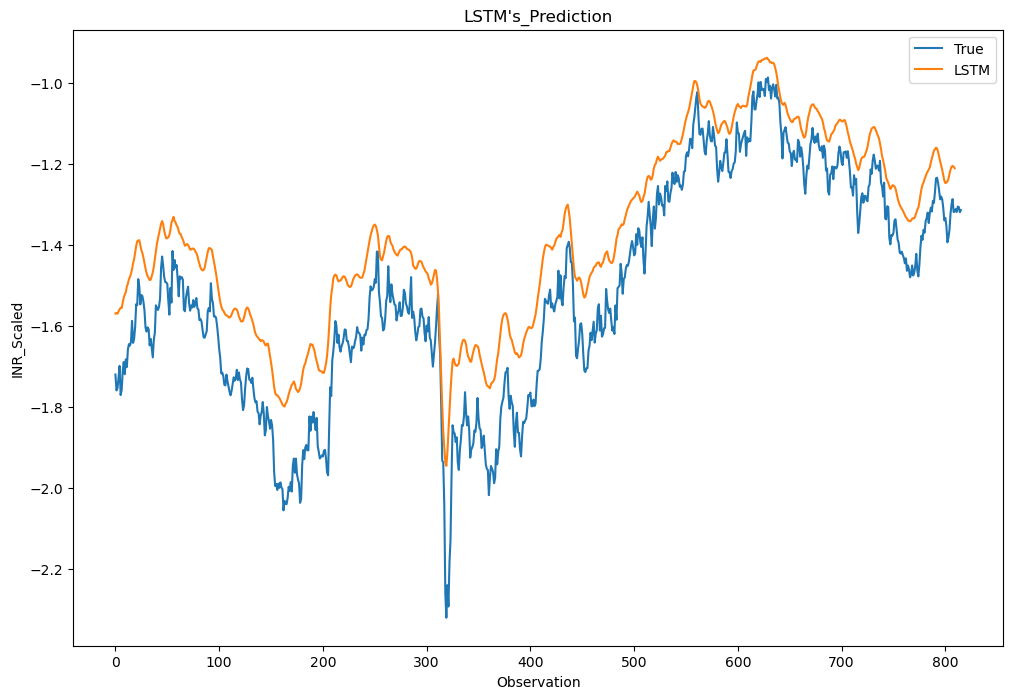

In [27]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [28]:
last_prediction = y_pred_test_lstm[-timesteps:]
last_prediction = np.array(last_prediction)

for i in range(10):
    next_input = np.array([last_prediction[-timesteps:]])
    next_input = next_input.reshape((next_input.shape[0], next_input.shape[1], 1))
    next_prediction = model_lstm.predict(next_input, verbose=0)
    last_prediction = np.append(last_prediction, next_prediction[0])
    

print(sc.inverse_transform(test_sc[-2:]))
lstm_future = np.array(last_prediction[-10:]).reshape(-1,1)

inverse_transformed_data_lstm = sc.inverse_transform(lstm_future).flatten().tolist()
print(inverse_transformed_data_lstm)






[[1.3533 ]
 [1.35432]]
[1.392987608909607, 1.3949029445648193, 1.3971995115280151, 1.3998174667358398, 1.4028019905090332, 1.4062618017196655, 1.4102736711502075, 1.4149051904678345, 1.4174931049346924, 1.4203228950500488]


In [29]:
lstm_rounded_numbers = [round(x, 5) for x in inverse_transformed_data_lstm]
print(lstm_rounded_numbers)
print(sc.inverse_transform(y_pred_test_lstm[-1:]))

[1.39299, 1.3949, 1.3972, 1.39982, 1.4028, 1.40626, 1.41027, 1.41491, 1.41749, 1.42032]
[[1.3755351]]


In [30]:
future_lstm_prices = []
last_lstm = sc.inverse_transform(y_pred_test_lstm[-1:])
future_lstm_prices.append(round(float(last_lstm[0]),5))
for x in lstm_rounded_numbers:
    future_lstm_prices.append(x)                     

In [41]:
#you just need to extract the cut off date plus one 

new_data_date = cut_off_date + pd.Timedelta(days=1)
predictions_future  = data_frame.loc[new_data_date:]

#This will output the first 10 predictions can be used for comparison 
future = predictions_future[:10]['close']



/var/folders/qs/tq01j0l577ddz8gg_tnvhl6m0000gn/T/ipykernel_55271/3484797789.py:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  predictions_future  = data_frame.loc[new_data_date:]


In [43]:
future_prices = []
for x in future:
    future_prices.append(x)


    
    

[1.36144, 1.35874, 1.36005, 1.35866, 1.35466, 1.33727, 1.34137, 1.34218, 1.3325, 1.34056]


In [36]:
print(sc.inverse_transform(y_test[-1:]))
print(sc.inverse_transform(y_pred_test_lstm[-1:]))

[[1.35432]]
[[1.3755351]]


In [37]:
print(future_lstm_prices)

[1.37554, 1.39299, 1.3949, 1.3972, 1.39982, 1.4028, 1.40626, 1.41027, 1.41491, 1.41749, 1.42032]


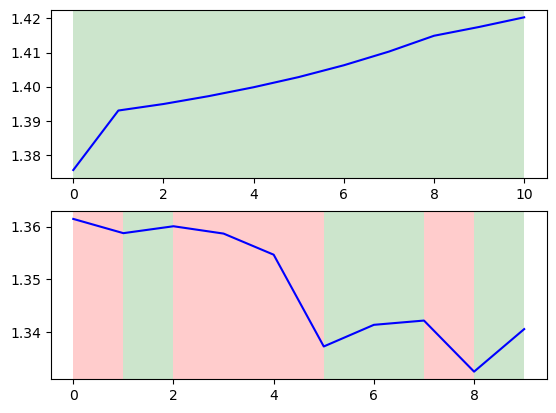

In [44]:
import matplotlib.pyplot as plt



def classify_numbers(lst):
    classifications = []
    prev_num = lst[0]
    for i, num in enumerate(lst[1:], start=1):
        if num > prev_num:
            classifications.append('green')
        else:
            classifications.append('red')
        prev_num = num
    return classifications

classifications1 = classify_numbers(future_lstm_prices)
classifications2 = classify_numbers(future_prices)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(future_lstm_prices, color='blue')
for i, c in enumerate(classifications1):
    if c == 'green':
        ax1.axvspan(i, i+1, facecolor='green', alpha=0.2)
    elif c == 'red':
        ax1.axvspan(i, i+1, facecolor='red', alpha=0.2)

ax2.plot(future_prices, color='blue')
for i, c in enumerate(classifications2):
    if c == 'green':
        ax2.axvspan(i, i+1, facecolor='green', alpha=0.2)
    elif c == 'red':
        ax2.axvspan(i, i+1, facecolor='red', alpha=0.2)

plt.show()


In [502]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [539]:
model_conv = Sequential()
model_conv.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5, 1)))
model_conv.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_conv.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(1, activation='linear'))


ValueError: Exception encountered when calling layer "max_pooling1d_24" (type MaxPooling1D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling1d_24/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_24/ExpandDims)' with input shapes: [?,1,1,64].

Call arguments received by layer "max_pooling1d_24" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 1, 64), dtype=float32)

In [514]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_data[:, :-1, :], train_data[:, -1, :], epochs=50, batch_size=32, validation_data=(test_data[:, :-1, :], test_data[:, -1, :]))


NameError: name 'train_data' is not defined